In [1]:
#loading the dataset
import pandas as pd 
dataset = pd.read_csv('customer_churn_dataset.csv', encoding = 'ISO-8859-1')
dataset.head()

,Customer_ID,Age,Gender,Location,Income,Total_Spending,Frequency_of_Purchases,Loyalty_Program,Customer_Service_Interactions,Time_Since_Last_Purchase,Product_Preferences,Discount_Usage,Churn
0,1,56,Male,Urban,48138,353.939093,32,1,7,195,Electronics,Low,0
1,2,69,Male,Suburban,112601,70.184106,27,0,2,350,Electronics,Medium,1
2,3,46,Male,Urban,49956,252.768658,30,1,7,43,Home Goods,Medium,0
3,4,32,Female,Suburban,127268,468.242012,43,1,2,185,Clothing,High,0
4,5,60,Male,Urban,124797,124.341773,2,1,9,342,Clothing,Medium,0


In [2]:
#Import libraries for EDA
import numpy as np 
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

import plotly.express as px 
import matplotlib.pyplot as plt 

#Reading the dataset
data_df = pd.read_csv("customer_churn_dataset.csv")
data_df.Gender[data_df.Gender == 'Male'] = 1
data_df.Gender[data_df.Gender == 'Female'] = 2
data_df.Location[data_df.Location == 'Urban'] = 1
data_df.Location[data_df.Location == 'Suburban'] = 2
data_df.Location[data_df.Location == 'Rural'] = 3
data_df.Product_Preferences[data_df.Product_Preferences == 'Electronics'] = 1
data_df.Product_Preferences[data_df.Product_Preferences == 'Home Goods'] = 2
data_df.Product_Preferences[data_df.Product_Preferences == 'Clothing'] = 3
data_df.Discount_Usage[data_df.Discount_Usage == "Low"] =1
data_df.Discount_Usage[data_df.Discount_Usage == "Medium"] =2
data_df.Discount_Usage[data_df.Discount_Usage == "High"] =3


#Getting an overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("Number of features:", df.shape[1])
    print("Data Features:")
    print(df.columns.tolist())
    print("Missing values:", df.isnull().sum().values.sum())
    print("Unique values:")
    print(df.nunique())

dataoveriew(data_df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  1000
Number of features: 13
Data Features:
['Customer_ID', 'Age', 'Gender', 'Location', 'Income', 'Total_Spending', 'Frequency_of_Purchases', 'Loyalty_Program', 'Customer_Service_Interactions', 'Time_Since_Last_Purchase', 'Product_Preferences', 'Discount_Usage', 'Churn']
Missing values: 0
Unique values:
Customer_ID                      1000
Age                                52
Gender                              2
Location                            3
Income                            996
Total_Spending                   1000
Frequency_of_Purchases             49
Loyalty_Program                     2
Customer_Service_Interactions      10
Time_Since_Last_Purchase          330
Product_Preferences                 3
Discount_Usage                      3
Churn                               2
dtype: int64


<Axes: >

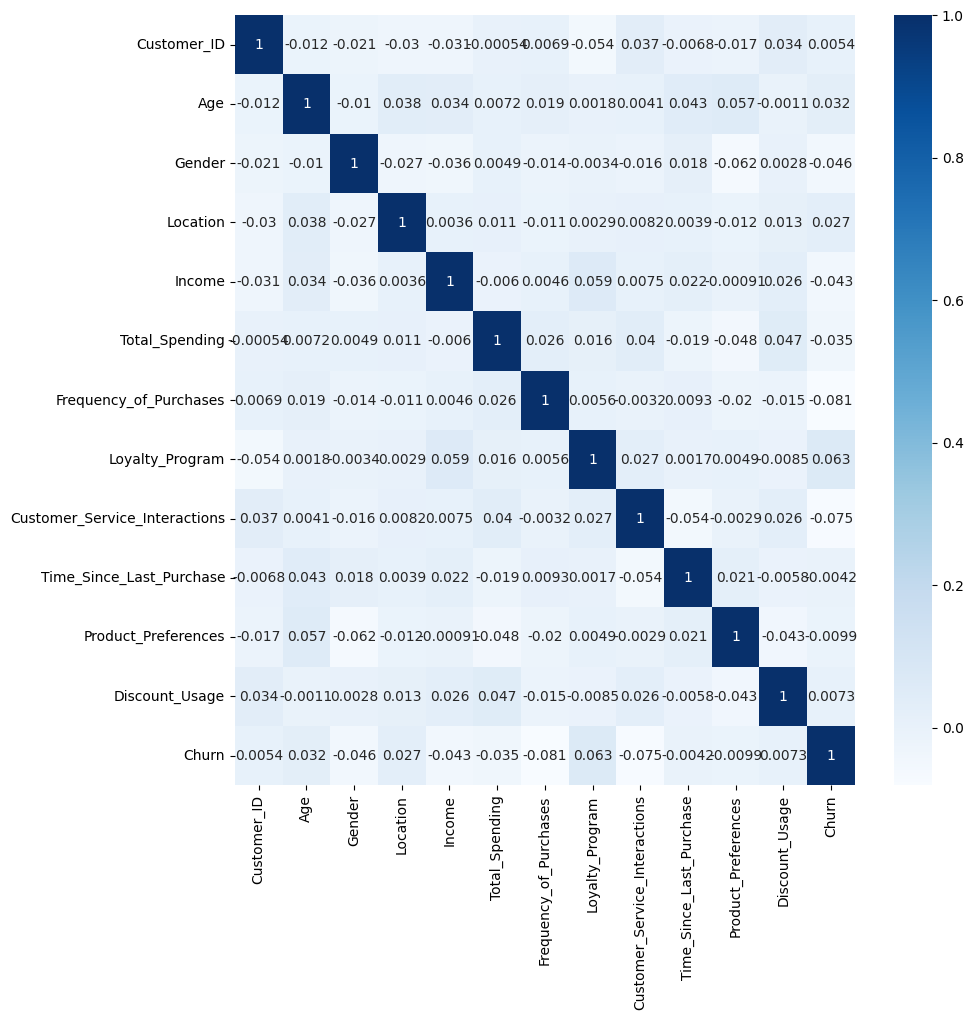

In [3]:
#checking the correlation between our independent variables
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Churn')

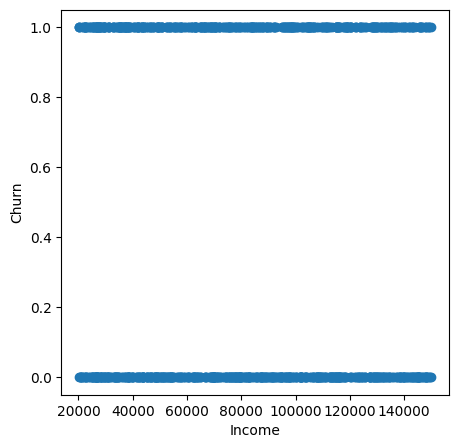

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x='Income',y='Churn',data=data_df)
plt.xlabel('Income')
plt.ylabel('Churn')

In [5]:
counts = data_df['Churn'].value_counts()
print(counts)

Churn
0    537
1    463
Name: count, dtype: int64


In [6]:
import pandas as pd
import plotly.express as px

def bar(feature, df=data_df):
    # Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    
    # Filter temp_df to include only churn cases where churn equals 1
    temp_df = temp_df[temp_df['Churn'] == 1]
    
    # Calculate the value counts of each distribution and its corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    
    # Calculate the value counts of each distribution and its corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    
    # Defining string formatting for graph annotation
    # Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    
    # Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    
    # Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    # Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green"], width=800)
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )

    return fig.show()


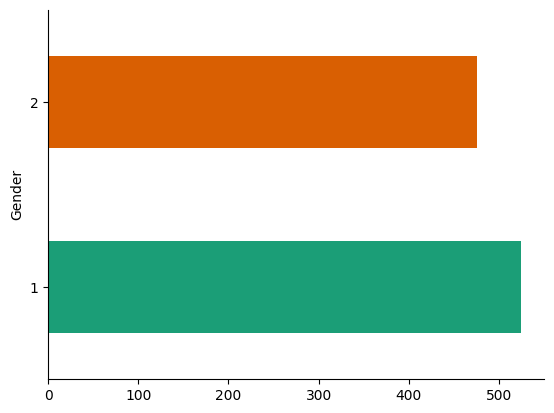

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
data_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
#Gender feature plot
bar('Gender')
#Partner feature plot
bar('Location')
#Dependents feature plot
bar('Product_Preferences')
#Dependents feature plot
bar('Discount_Usage')

C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  categories = [cat[1][0] for cat in value_counts_df.iterrows()]
C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_list = [num[1][1] for num in value_counts_df.iterrows()]


C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\AISHANI\AppData\Local\Temp\ipykernel_820\1886229863.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [9]:
data_df['Churn'] = data_df['Churn'].astype('int')
data_df.head()

,Customer_ID,Age,Gender,Location,Income,Total_Spending,Frequency_of_Purchases,Loyalty_Program,Customer_Service_Interactions,Time_Since_Last_Purchase,Product_Preferences,Discount_Usage,Churn
0,1,56,1,1,48138,353.939093,32,1,7,195,1,1,0
1,2,69,1,2,112601,70.184106,27,0,2,350,1,2,1
2,3,46,1,1,49956,252.768658,30,1,7,43,2,2,0
3,4,32,2,2,127268,468.242012,43,1,2,185,3,3,0
4,5,60,1,1,124797,124.341773,2,1,9,342,3,2,0


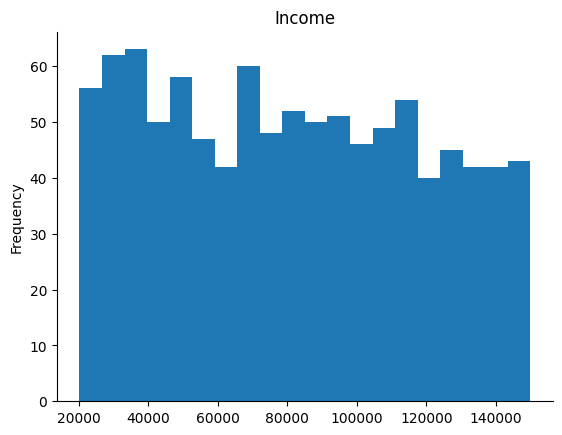

In [10]:
# @title Income

from matplotlib import pyplot as plt
data_df['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
X = np.asarray(data_df[['Age', 'Gender', 'Location', 'Income', 'Total_Spending', 'Frequency_of_Purchases', 'Loyalty_Program', 'Customer_Service_Interactions', 'Time_Since_Last_Purchase', 'Product_Preferences','Discount_Usage']])
X[0:5]

array([[56, 1, 1, 48138, 353.9390934, 32, 1, 7, 195, 1, 1],
       [69, 1, 2, 112601, 70.18410561, 27, 0, 2, 350, 1, 2],
       [46, 1, 1, 49956, 252.7686585, 30, 1, 7, 43, 2, 2],
       [32, 2, 2, 127268, 468.2420125, 43, 1, 2, 185, 3, 3],
       [60, 1, 1, 124797, 124.3417727, 2, 1, 9, 342, 3, 2]], dtype=object)

In [12]:
y = np.asarray(data_df['Churn'])
y [0:5]

array([0, 1, 0, 0, 0])

In [13]:
#splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

In [17]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_df['Income'] = sc.fit_transform(data_df[['Income']])
data_df['Total_Spending'] = sc.fit_transform(data_df[['Total_Spending']])


In [18]:
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.5
precision:  0.45652173913043476
recall:  0.21875
f1_score:  0.4604214433890162


c:\Users\AISHANI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [19]:
# Considering Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

c:\Users\AISHANI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\AISHANI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

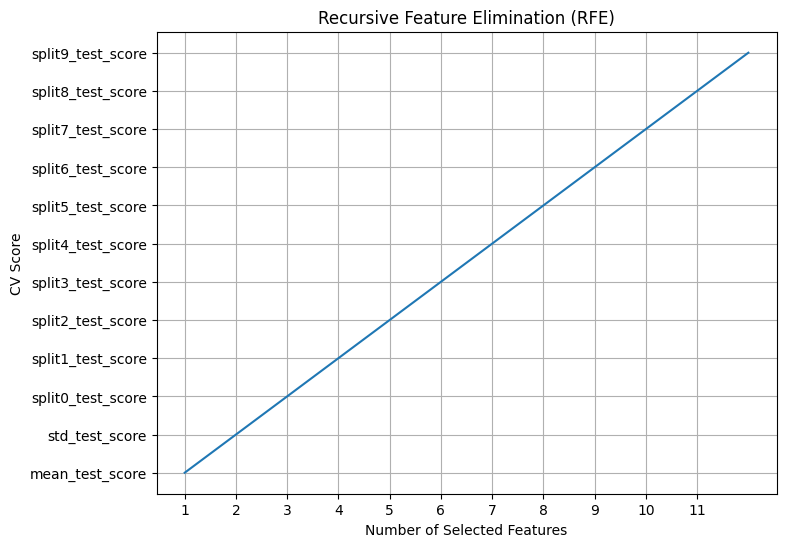

The optimal number of features: 7


In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(list(rfecv.cv_results_))+1), list(rfecv.cv_results_))
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

However, since our dataset already has a small number of features, reducing this may lead to underfitting. So I will not attempt feature selection. Now I will try other classification algorithms that may give us a better f1_score

In [21]:
#using solvers with logistic regression for better accuracy
logistic_params = {
    'C': 0.01,
    'solver': 'liblinear'
}
log_model = modeling(LogisticRegression, 'Logistic Regression', params=logistic_params)

Logistic Regression
accuracy:  0.5
precision:  0.4523809523809524
recall:  0.19791666666666666
f1_score:  0.45370063060073024


In [22]:
### Trying other machine learning algorithms: SVC
from sklearn.svm import SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.52
precision:  0.0
recall:  0.0
f1_score:  0.35578947368421054


c:\Users\AISHANI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [23]:
#trying random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.485
precision:  0.4461538461538462
recall:  0.3020833333333333
f1_score:  0.4688188362483433


In [24]:
# Applying Naive bayes which is used when the features are independent of each other, as seems to be the case in our dataset 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
nb_model = modeling(GaussianNB, "Naive Bayes Classification")

Naive Bayes Classification
accuracy:  0.5
precision:  0.46
recall:  0.23958333333333334
f1_score:  0.4665084672635099


In [25]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")

Decision Tree Classification
accuracy:  0.545
precision:  0.5308641975308642
recall:  0.4479166666666667
f1_score:  0.5410230295660106


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': 100,
    'learning_rate': 1.0,
    'max_depth': 5,
    'random_state': 0
}
gb_model = modeling(GradientBoostingClassifier, 'Gradient Boosting Classifier', params=gb_params)

Gradient Boosting Classifier
accuracy:  0.51
precision:  0.4883720930232558
recall:  0.4375
f1_score:  0.5077769936485533


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': 5,
    'weights': 'distance'
}
knn_model = modeling(KNeighborsClassifier, 'K-Nearest Neighbors Classifier', params=knn_params)

K-Nearest Neighbors Classifier
accuracy:  0.475
precision:  0.44
recall:  0.34375
f1_score:  0.4668352102964836


In [30]:
from sklearn.datasets import make_classification
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}
 
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3}
Best score is 0.534


In [31]:
#Grid search approach to hypeparameter optimisation for KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# defining dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# defining models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# defining grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarizing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.971667 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.869333 (0.030214) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.869333 (0.030214) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.921333 (0.020774) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.921333 (0.020774) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.942667 (0.018785) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.942667 (0.018785) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.947667 (0.018015) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.947667 (0.018015) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.957000 (0.019000) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.957000 (0.019000) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.963333 

In [32]:
#building the logistic regression model
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [33]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [34]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52391194, 0.47608806],
       [0.46678506, 0.53321494],
       [0.55465726, 0.44534274],
       [0.52778407, 0.47221593],
       [0.52141224, 0.47858776],
       [0.4931244 , 0.5068756 ],
       [0.57463484, 0.42536516],
       [0.45723362, 0.54276638],
       [0.55838777, 0.44161223],
       [0.56492125, 0.43507875],
       [0.44267837, 0.55732163],
       [0.57009723, 0.42990277],
       [0.52281147, 0.47718853],
       [0.53321977, 0.46678023],
       [0.54530288, 0.45469712],
       [0.5077974 , 0.4922026 ],
       [0.58720942, 0.41279058],
       [0.57452663, 0.42547337],
       [0.58637804, 0.41362196],
       [0.49798698, 0.50201302],
       [0.58475032, 0.41524968],
       [0.52301475, 0.47698525],
       [0.45263165, 0.54736835],
       [0.53608844, 0.46391156],
       [0.51268622, 0.48731378],
       [0.48215858, 0.51784142],
       [0.51972083, 0.48027917],
       [0.59724354, 0.40275646],
       [0.45717205, 0.54282795],
       [0.48786158, 0.51213842],
       [0.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[19 77]
 [23 81]]


Confusion matrix, without normalization
[[19 77]
 [23 81]]


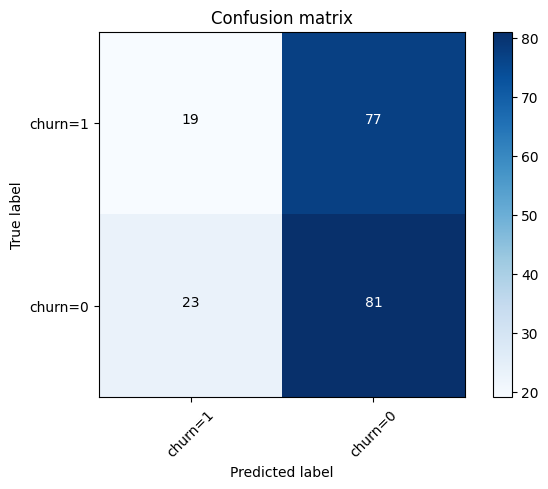

In [36]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [37]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.51      0.78      0.62       104
           1       0.45      0.20      0.28        96

    accuracy                           0.50       200
   macro avg       0.48      0.49      0.45       200
weighted avg       0.48      0.50      0.45       200



From the above algorithms, decsion trees and logistic regression using 'liblinear' gve the best results. 